In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Separate pitch counts between home and away
path_counts = '' # Path to the directory with the pitch count files
pitch_count_files = os.listdir(path_counts)
home_files = [files for files in pitch_count_files if files[4:]=='Home']
away_files = [files for files in pitch_count_files if files[4:]=='Away']


# Produce DataFrames for all home and away pitch count
home_counts = pd.DataFrame()
away_counts = pd.DataFrame()

for file in home_files:
    cur_home = pd.read_csv(path_counts+file, index_col=[0])
    cur_home = pd.concat({file[:4]:cur_home}, names=['Year', 'Team'])
    home_counts = pd.concat([home_counts,cur_home])
    
for file in away_files:
    cur_away = pd.read_csv(path_counts+file, index_col=[0])
    cur_away = pd.concat({file[:4]:cur_away}, names=['Year', 'Team'])
    away_counts = pd.concat([away_counts,cur_away])
    
    
# For each team, convert total number of pitch counts to fraction of the team's at-bats
home_counts_frac = home_counts.div(home_counts.sum(axis=1),axis=0)
away_counts_frac = away_counts.div(away_counts.sum(axis=1),axis=0)

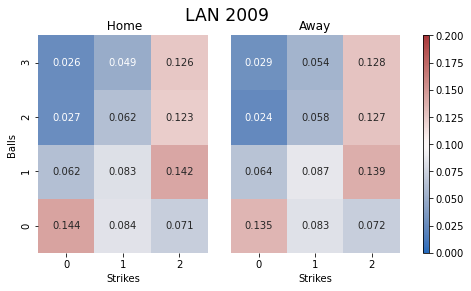

In [71]:
import random

# Select Team and Season to display heatmap
random_team = random.choice(home_counts.index)
year = random_team[0]
team = random_team[1]


# Take data on selected team, and restructure so 'x-axis' is strikes and 'y-axis' is balls
cur_team_home = home_counts_frac.loc[(year,team)].to_numpy().reshape(3,4).T
cur_team_away = away_counts_frac.loc[(year,team)].to_numpy().reshape(3,4).T


# Plot home and away data for selected team
fig, ax = plt.subplots(1,3,figsize=(7,4),gridspec_kw=dict(width_ratios=[3,3,0.1]))
sns.heatmap(cur_team_home,cmap = 'vlag',ax=ax[0],annot=True,fmt='.3f',cbar=False,vmin=0.0,vmax=0.2)
sns.heatmap(cur_team_away,cmap = 'vlag',ax=ax[1],annot=True,fmt='.3f',yticklabels=False,cbar=False,vmin=0.0,vmax=0.2)
plt.colorbar(ax[1].collections[0],cax=ax[2])

ax[0].invert_yaxis()
ax[1].invert_yaxis()

plt.suptitle(team+' '+year).set_size('xx-large')
ax[0].set_title(' Home')
ax[1].set_title('Away')
ax[0].set_ylabel('Balls')
ax[0].set_xlabel('Strikes')
ax[1].set_xlabel('Strikes')
plt.show()